In [2]:
import pandas as pd
import numpy as np

"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

In [3]:
"MATPLOTLIB"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [4]:
"PARA IMPORTAR DE IPYNB"
import import_ipynb
import utils

importing Jupyter notebook from utils.ipynb


In [5]:
ephemeris = pd.read_csv("../ephemeris2.csv")
ephemeris['hours'] = 24*(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0])
MIN = ephemeris['delta (Rt)'].argmin()


'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


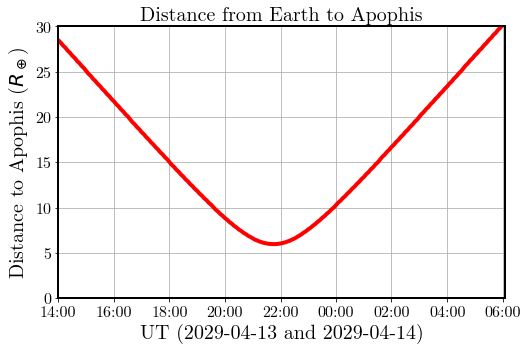

In [6]:
def xaxes():
    xticks = range(6,len(ephemeris),24)
    plt.xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    plt.xticks([ephemeris['hours'][i] for i in xticks],
                [ephemeris['datetime_str'][i][-5:] for i in xticks], size=16)
    

fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Distance from Earth to Apophis",size=20)
ax.plot(ephemeris['hours'],ephemeris['delta (Rt)'],'r-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Distance to Apophis ($R_\oplus$)")
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,30])

name = "../Figures/fig1_distance_plot"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


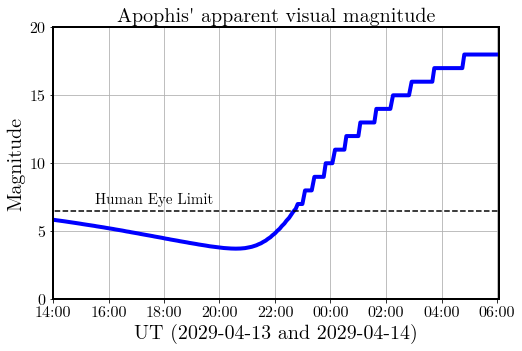

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent visual magnitude",size=20)
ax.plot(ephemeris['hours'],ephemeris['V'],'b-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Magnitude")
ax.text(ephemeris['hours'][0]+2,7,"Human Eye Limit",size=15)
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,20])

plt.plot([-10,100],[6.5,6.5],'k--')

name = "../Figures/fig3_magV"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

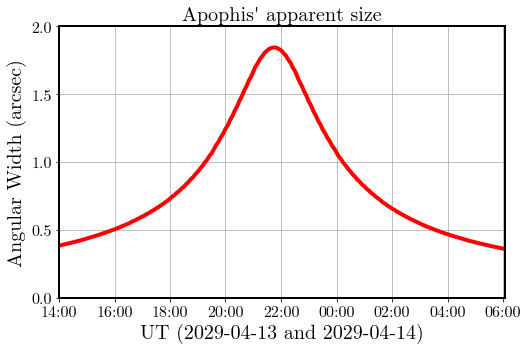

In [8]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,2])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

## Loading Observatory Data

In [27]:
radio =  pd.read_csv("../AllRadiotelescopes.csv").dropna(axis=0,how='all')
# radio

In [10]:
angles = []
for r,row in ephemeris.iterrows():
    angle = utils.size_angle(radio.iloc[0],row)
    angles.append( angle.to(u.arcsec).value )

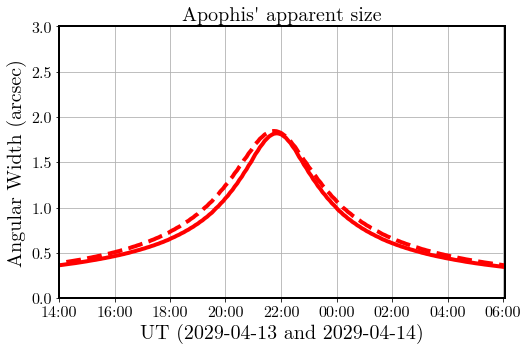

In [11]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],angles,'r-',lw=4)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r--',lw=4)

ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,3])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

In [16]:
radio.Name

0                      Arecibo
1                    Goldstone
2                   Green Bank
3             Very Large Array
4                         FAST
5                        CDSCC
6                        EDSCC
7     Usuda Deep Space Center 
8                   Effelsberg
9                       Lovell
10               Madrid DSS-63
11                      Parkes
12                   AVN-Ghana
Name: Name, dtype: object

In [28]:
radio_pairs = [
               (radio.iloc[5],radio.iloc[11]), # Canberra vs Parkes
               (radio.iloc[5],radio.iloc[4]), # Canberra vs Fast
               (radio.iloc[7],radio.iloc[4]), # Usuda vs Fast
               (radio.iloc[10],radio.iloc[8]), # Madrid vs Effelsberg
               (radio.iloc[10],radio.iloc[9]), # Madrid vs Lovell
               (radio.iloc[10],radio.iloc[12]), # Madrid vs Ghana
               (radio.iloc[1],radio.iloc[2]), # Goldstone vs GBT
               (radio.iloc[1],radio.iloc[3]), # Goldstone vs VLA
               (radio.iloc[1],radio.iloc[4]), # Goldstone vs FAST
]

[(x.Name,y.Name) for x,y in radio_pairs]

[('Canberra DSS-43', 'Parkes'),
 ('Canberra DSS-43', 'FAST'),
 ('Usuda Deep Space Center ', 'FAST'),
 ('Madrid DSS-63', 'Effelsberg'),
 ('Madrid DSS-63', 'Lovell'),
 ('Madrid DSS-63', 'AVN-Ghana'),
 ('Goldstone', 'Green Bank'),
 ('Goldstone', 'Very Large Array'),
 ('Goldstone', 'FAST')]

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


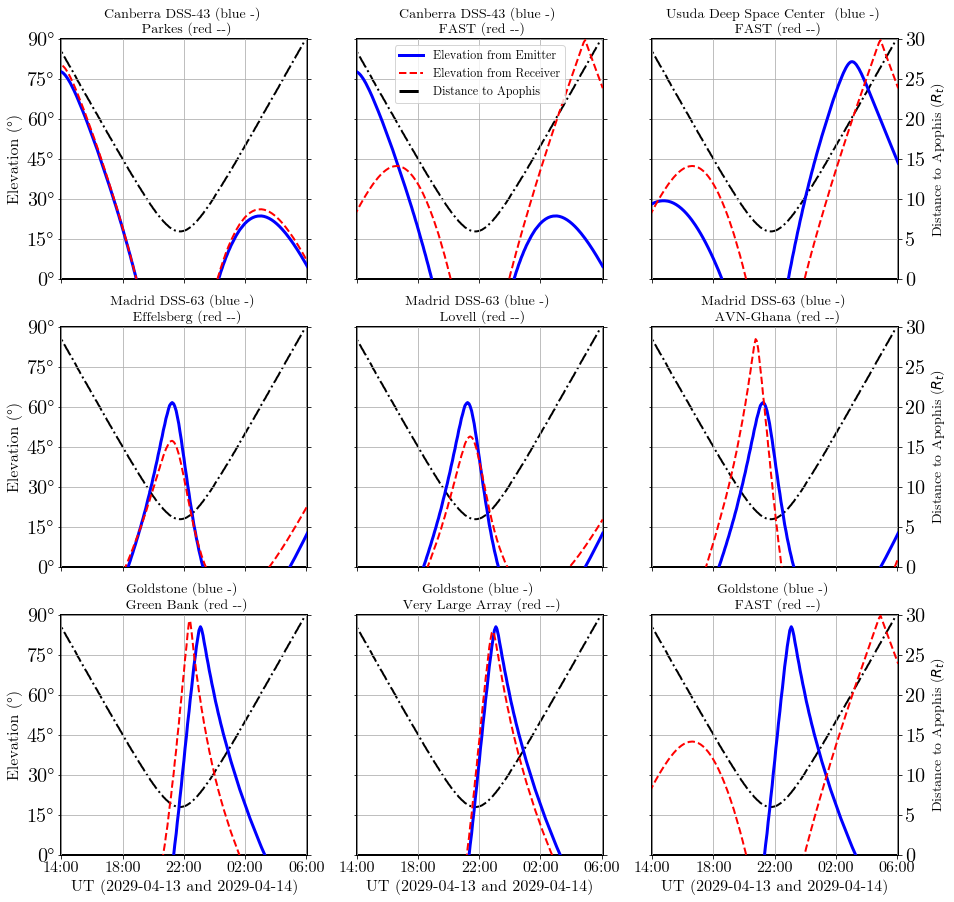

In [33]:
def axes(ax,i):
    ax.grid()
    ax.set_ylim([0,90])
    ax.set_xlim([0,ephemeris['hours'].iloc[-1]])
    xticks = range(6,len(ephemeris),48)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    yticks = list(range(0,91,15))
    ax.set_yticks(yticks)

    if i > 5:
        ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)
        ax.set_xlabel("UT (2029-04-13 and 2029-04-14)",size=16)
    else:
        ax.set_xticklabels([])

    if i%3 == 0:
        ax.set_yticklabels(["%i°"%h for h in yticks])
        ax.set_ylabel("Elevation (°)",size=16)
    else:
        ax.set_yticklabels([])

    if i == 1:
        ax.legend(fontsize=12)

fig, axs = plt.subplots(3,3, figsize=(15,15))
for i,pairobs in enumerate(radio_pairs):
    obs1, obs2 = pairobs
    pair = utils.observatory_pair(obs1,obs2,ephemeris)

    ax = axs.flat[i]
    ax2=ax.twinx()

    ax2.plot(ephemeris['hours'],ephemeris['delta (Rt)'],'k-.',lw=2)
    ax2.set_yticks([])

    ax.set_title(f"{obs1['Name']} (blue -) \n {obs2['Name']} (red --)",size=14)
    ax.plot(ephemeris['hours'],pair['elevation1'],label=f"Elevation from Emitter",lw=3,color='b')
    ax.plot(ephemeris['hours'],pair['elevation2'],'--',label=f"Elevation from Receiver",lw=2,color='r')
    ax.plot([-100],[-100],'k-.',label='Distance to Apophis',lw=3)
    # ax.set_ylabel("Apophis' Elevation (°)",size=14)
    axes(ax,i)

    yticks = list(range(0,31,5))
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([])
    ax2.set_ylim([0,30])

    if (i+1)%3==0:
        ax2.set_ylabel("Distance to Apophis ($R_t$)",size=14)
        ax2.set_yticklabels(yticks)

    ax.set_zorder(ax2.get_zorder()+1)
    ax.set_frame_on(False)

name = "../Figures/fig4_pairs"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


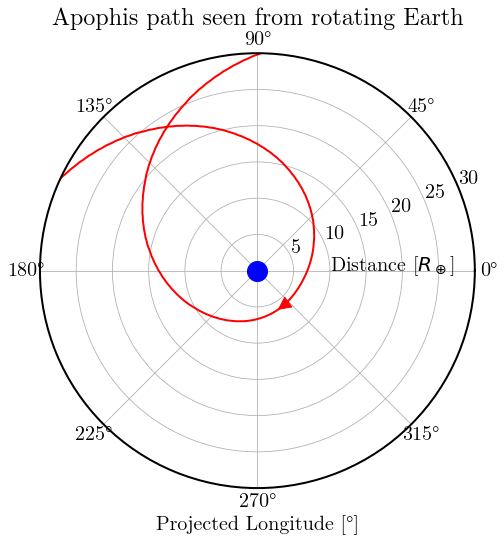

In [14]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(15,8))
line = ax.plot(np.deg2rad(ephemeris['Longitude']),ephemeris['delta (Rt)'],'r-',lw=2)[0]
ax.set_xlabel("Projected Longitude [°]")
ax.text(0.*np.pi/4,10,"Distance [$R_\oplus$]",rotation=0)
ax.set_ylim([0,30])
ax.set_title("Apophis path seen from rotating Earth")
ax.plot(0,0,'bo',ms=20)
add_arrow(line,size=30)
# xticks = np.arange(0,2*np.pi,np.pi/4)
# xtickslabels = ["%i°E"%np.rad2deg(t) if t<=np.pi else "%i°W"%np.rad2deg(abs(t-2*np.pi)) for t in xticks]
# ax.set_xticks(xticks)
# ax.set_xticklabels(xtickslabels)

name = "../Figures/fig7_polar"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')